In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# open the raw data
file_path = '../data/processed/merged_file.csv'  
df = pd.read_csv(file_path)

In [ ]:
# open the list of all valid station names
with open('../data/processed/valid_stations.txt', 'r') as file:
    valid_stations = [line.strip() for line in file.readlines()]

In [ ]:
# combine stations with different names that refer to the same station
kennedy_station = ['KENNEDY STATION', 'KENNEDY BD STATION']
bloor_yonge_station = ['YONGE UNIVERSITY AND B', 'YONGE STATION',
                       'YONGE AND BLOOR', 'BLOOR STATION',
                       'YONGE/UNIVERSITY AND B', 'YONGE-UNIVERSITY AND B',
                       'YONGE BD STATION']
spadina_station = ['SPADINA YUS STATION', 'YONGE UNIVERSITY SPADI', 
                   'SPADINA STATION', 'SPADINA BD STATION']
union_station = ['UNION STATION TOWARDS', 'UNION STATION']
st_george_station = ['ST GEORGE YUS STATION', 'ST GEORGE BD STATION']

In [ ]:
# create data frames for each station that needed to be changed
station_delay_df = df.groupby('Station')['Min Delay'].sum().reset_index()
filtered_df = station_delay_df[station_delay_df['Station'].isin(valid_stations)]
filtered_df = filtered_df[['Station', 'Min Delay']]

kennedy_df = df[df['Station'].isin(kennedy_station)]
bloor_yonge_df = df[df['Station'].isin(bloor_yonge_station)]
spadina_df = df[df['Station'].isin(spadina_station)]
union_df = df[df['Station'].isin(union_station)]
st_george_df = df[df['Station'].isin(st_george_station)]

kennedy_delay = kennedy_df['Min Delay'].sum()
bloor_yonge_delay = bloor_yonge_df['Min Delay'].sum()
spadina_delay = spadina_df['Min Delay'].sum()
union_delay = union_df['Min Delay'].sum()
st_george_delay = st_george_df['Min Delay'].sum()

In [7]:
print(kennedy_delay)
print(bloor_yonge_delay)
print(spadina_delay)
print(union_delay)
print(st_george_delay)

6119
9946
5745
3622
7482


In [8]:
new_kennedy_record = pd.DataFrame({
    'Station': ['KENNEDY STATION'],
    'Min Delay': [kennedy_delay]
})
new_bloor_yonge_record = pd.DataFrame({
    'Station': ['BLOOR-YONGE STATION'],
    'Min Delay': [bloor_yonge_delay]
})
new_spadina_record = pd.DataFrame({
    'Station': ['SPADINA STATION'],
    'Min Delay': [spadina_delay]
})
new_union_record = pd.DataFrame({
    'Station': ['UNION STATION'],
    'Min Delay': [union_delay]
})
new_st_george_record = pd.DataFrame({
    'Station': ['ST GEORGE STATION'],
    'Min Delay': [st_george_delay]
})


In [9]:
filtered_df = pd.concat([filtered_df, new_kennedy_record], ignore_index=True)
filtered_df = pd.concat([filtered_df, new_bloor_yonge_record], ignore_index=True)
filtered_df = pd.concat([filtered_df, new_spadina_record], ignore_index=True)
filtered_df = pd.concat([filtered_df, new_union_record], ignore_index=True)
filtered_df = pd.concat([filtered_df, new_st_george_record], ignore_index=True)

                Station  Min Delay
71  BLOOR-YONGE STATION       9946
74    ST GEORGE STATION       7482
21        FINCH STATION       6744
18     EGLINTON STATION       6642
70      KENNEDY STATION       6119
72      SPADINA STATION       5745
31      KIPLING STATION       5720
65       WILSON STATION       4649
10   DAVISVILLE STATION       4262
63       WARDEN STATION       4218


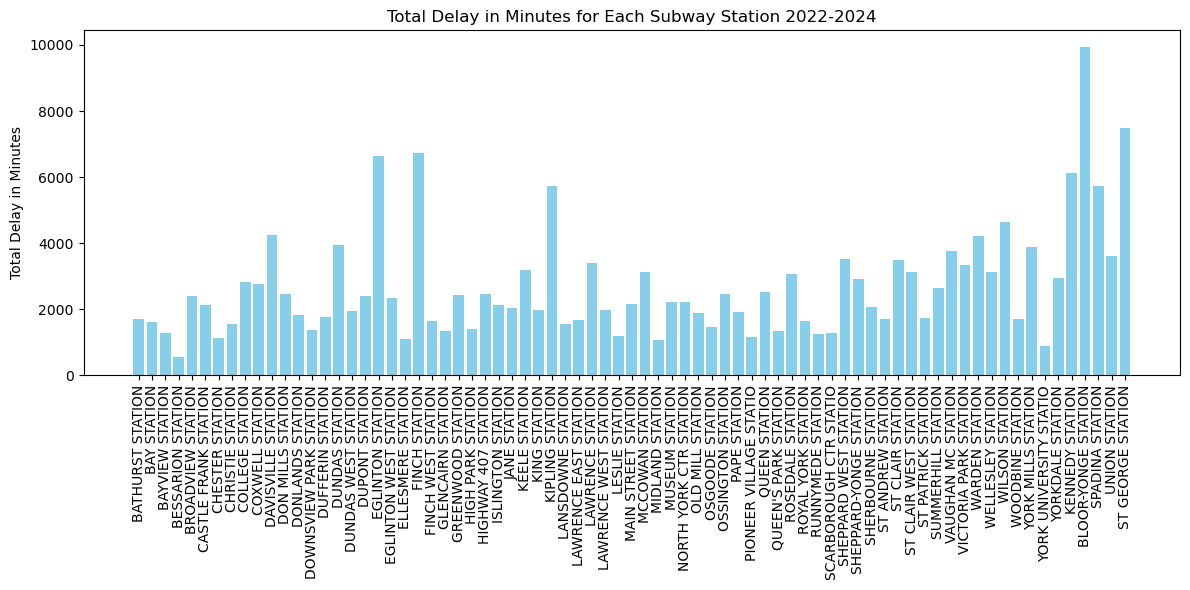

In [10]:
pd.set_option('display.max_rows', None)

top_10 = filtered_df.nlargest(10, 'Min Delay')
print(top_10[['Station', 'Min Delay']])

plt.figure(figsize=(12, 6))  
plt.bar(filtered_df['Station'], filtered_df['Min Delay'], color='skyblue')
plt.ylabel('Total Delay in Minutes')
plt.title('Total Delay in Minutes for Each Subway Station 2022-2024')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()
